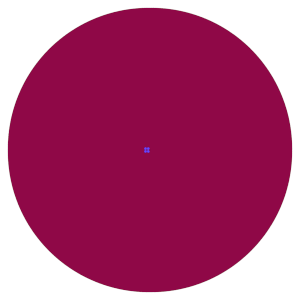

In [2]:
import itertools
import math
import os
import fresnel.material
import hoomd
import numpy
import gsd.hoomd
import warnings
import fresnel
import IPython
import packaging.version

fn = os.path.join(os.getcwd(), 'lattice.gsd')
if os.path.exists(fn):
    os.remove(fn)

device = fresnel.Device()
tracer = fresnel.tracer.Path(device=device, w=300, h=300)


def render(L):
    
    scene = fresnel.Scene(device)
    geom = fresnel.geometry.Sphere(scene, position = [[-3.2, 1, 0], [-3.2, -1, 0], [-1.2, 1, 0], [-1.2, -1, 0]], radius=1.0)
    geom.material = fresnel.material.Material(solid = 1.0, color=fresnel.color.linear([0.42, 0.267, 1]))
    geom.outline_width = 0.12
    
    geometry = fresnel.geometry.Polygon(scene,
                                        rounding_radius=100,
                                        N=1,
                                        vertices = [[-1, -1], [1, -1],
                                                    [1, 1], [-1, 1]],
                                                    outline_width=1)

    geometry.material.color = fresnel.color.linear([0.56, 0.03, 0.28])
    geometry.material.solid=1

    geometry.outline_width = 0.01
    fresnel.geometry.Box(scene, [L, L, L, 0, 0, 0], box_radius=0.02)

    scene.lights = [
        fresnel.light.Light(direction=(0, 0, 1), color=(0.8, 0.8, 0.8), theta=math.pi),
        fresnel.light.Light(
            direction=(1, 1, 1), color=(1.1, 1.1, 1.1), theta=math.pi / 3
        ),
    ]
    scene.camera = fresnel.camera.Orthographic.fit(scene)

    scene.background_color = (1, 1, 1)
    scene.background_alpha = 1
    return IPython.display.Image(tracer.sample(scene, samples=500)._repr_png_())


m = 1
N_particles = 2 * m 

spacing = 1.2
L = spacing 

render(L=1.2)


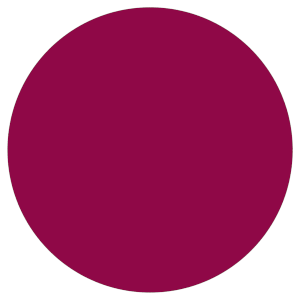

In [14]:
import itertools
import math
import os
import hoomd
import numpy
import gsd.hoomd
import warnings
import fresnel
import IPython
import packaging.version

fn = os.path.join(os.getcwd(), 'lattice.gsd')
if os.path.exists(fn):
    os.remove(fn)

device = fresnel.Device()
tracer = fresnel.tracer.Path(device=device, w=300, h=300)

FRESNEL_MIN_VERSION = packaging.version.parse('0.13.0')
FRESNEL_MAX_VERSION = packaging.version.parse('0.14.0')

def render(L, N_particles):
    if (
        'version' not in dir(fresnel)
        or packaging.version.parse(fresnel.version.version) < FRESNEL_MIN_VERSION
        or packaging.version.parse(fresnel.version.version) >= FRESNEL_MAX_VERSION
    ):
        warnings.warn(
            f'Unsupported fresnel version {fresnel.version.version} - expect errors.'
        )

    scene = fresnel.Scene(device)

    # Calculate positions for the circles based on N_particles
    positions = []
    radius = L / (2 * N_particles)  # Calculate radius based on spacing and number of circles
    for i in range(N_particles):
        angle = 2 * math.pi * i / N_particles
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        positions.append((x, y))

    # Create circles at calculated positions
    for pos in positions:
        geometry = fresnel.geometry.Polygon(scene,
                                             rounding_radius=1000,
                                             N=1,
                                             vertices=[[0, 0], [0, 1], [1, 1], [1, 0]],
                                             outline_width=1)
        geometry.material.color = fresnel.color.linear([0.56, 0.03, 0.28])
        geometry.material.solid = 1

        # Set position for each circle
          # Add z-coordinate as well (0)

    fresnel.geometry.Box(scene, [L, L, L, 0, 0, 0], box_radius=0.02)

    scene.lights = [
        fresnel.light.Light(direction=(0, 0, 1), color=(0.8, 0.8, 0.8), theta=math.pi),
        fresnel.light.Light(direction=(1, 1, 1), color=(1.1, 1.1, 1.1), theta=math.pi / 3),
    ]
    scene.camera = fresnel.camera.Orthographic.fit(scene)

    scene.background_color = (1, 1, 1)
    scene.background_alpha = 1
    return IPython.display.Image(tracer.sample(scene, samples=500)._repr_png_())

m = 1
N_particles = 5  # Specify the number of circles
spacing = 1.2
L = spacing 

render(L=L, N_particles=N_particles)

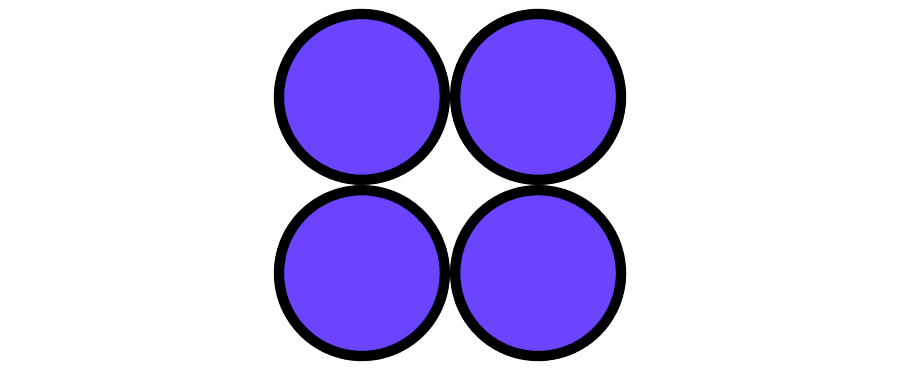

In [89]:
import fresnel
scene = fresnel.Scene()
geom1 = fresnel.geometry.Sphere(scene, position = [[-3.2, 1, 0], [-3.2, -1, 0], [-1.2, 1, 0], [-1.2, -1, 0]], radius=1.0)
geom1.material = fresnel.material.Material(solid=1.0, color=fresnel.color.linear([0.42,0.267,1]))
geom1.outline_width = 0.12

scene.camera = fresnel.camera.Orthographic.fit(scene)
fresnel.preview(scene, w=900, h=370)



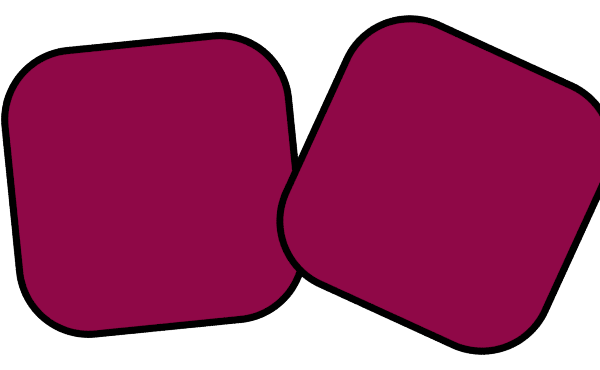

In [34]:
import fresnel 

scene2 = fresnel.Scene()
geometry2 = fresnel.geometry.Polygon(scene2,
                                     rounding_radius=1,
                                     N=2,
                                     vertices = [[-1, -1], [1, -1],
                                                 [1, 1], [-1, 1]],
                                     outline_width=0.1)
geometry2.position[:] = [[-2,0],
                        [2, 0]]
geometry2.angle[:] = [0.1, -2.0]
geometry2.material.color=fresnel.color.linear([0.56,0.03,0.28])
geometry2.material.solid=1
scene2.camera = fresnel.camera.Orthographic.fit(scene2)

fresnel.preview(scene2)

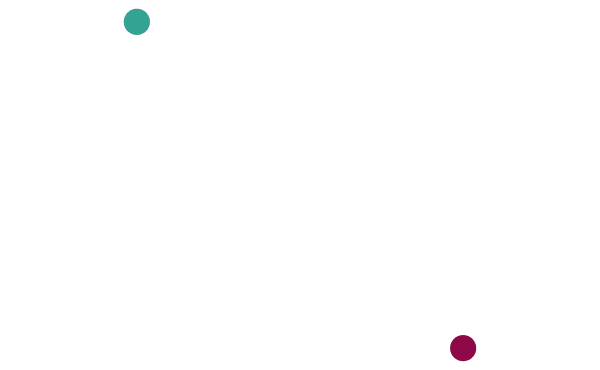

In [53]:
import fresnel
import numpy as np

# Create a new scene
scene = fresnel.Scene()

# Parameters for the circles
num_vertices = 70  # Number of vertices to approximate the circle
radius = 0.02      # Radius of the circles

# Generate vertices for the first circle
theta = np.linspace(0, 2 * np.pi, num_vertices)
circle1_vertices = radius * np.column_stack((np.cos(theta), np.sin(theta)))

# Create the first polygon (circle)
geometry1 = fresnel.geometry.Polygon(
    scene,
    vertices=circle1_vertices,
    outline_width=0,  # Set outline width to 0 for filled circles
)

# Set the position of the first circle
geometry1.position[:] = [[-0.5, 0]]  # Adjust as needed
geometry1.material.color = fresnel.color.linear([0.20, 0.64, 0.58])
geometry1.material.solid = 1

# Generate vertices for the second circle
circle2_vertices = radius * np.column_stack((np.cos(theta), np.sin(theta)))

# Create the second polygon (circle)
geometry2 = fresnel.geometry.Polygon(
    scene,
    vertices=circle2_vertices,
    outline_width=0,  # Set outline width to 0 for filled circles
)

# Set the position of the second circle
geometry2.position[:] = [[0, -0.5]]  # Adjust as needed
geometry2.material.color = fresnel.color.linear([0.56, 0.03, 0.28])
geometry2.material.solid = 1

# Fit the camera to the scene
scene.camera = fresnel.camera.Orthographic.fit(scene)

# Preview the scene
fresnel.preview(scene)

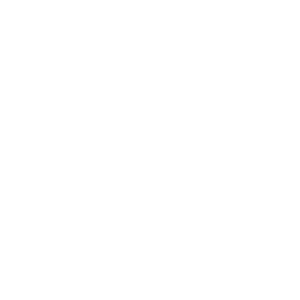

In [85]:
import fresnel
import numpy as np
import IPython.display

# Create a tracer on the desired device (CPU or GPU)
device = fresnel.Device()  # Change to 'gpu' if using a GPU
tracer = fresnel.tracer.Path(device=device, w=300, h=300)

def render(L, N_particles, tracer):
    scene = fresnel.Scene(device)

    # Parameters for the circles
    num_vertices = 70  # Number of vertices to approximate the circle
    radius = 0.14      # Radius of the circles

    # Create circles based on N_particles
    for i in range(N_particles):
        # Calculate position based on index
        x_position = (i % 2) * spacing - spacing / 2  # Adjust x position for two circles
        y_position = (i // 2) * -spacing + spacing / 2  # Adjust y position for two circles

        # Generate vertices for the circle
        theta = np.linspace(0, 2 * np.pi, num_vertices)
        circle_vertices = radius * np.column_stack((np.cos(theta), np.sin(theta)))

        # Create the polygon (circle)
        geometry = fresnel.geometry.Polygon(
            scene,
            vertices=circle_vertices,
            outline_width=0,  # Set outline width to 0 for filled circles
        )

        # Set the position of the circle
        geometry.position[:] = [[x_position, y_position]]  # Set position based on calculated values
        geometry.material.color = fresnel.color.linear([0.20, 0.64, 0.58]) if i % 2 == 0 else fresnel.color.linear([0.56, 0.03, 0.28])
        geometry.material.solid = 1

    # Fit the camera to the scene
    scene.camera = fresnel.camera.Orthographic.fit(scene)

    # Set the background color
    scene.background_color = (1, 1, 1)
    scene.background_alpha = 1
    
    # Render the scene and return the image
    return IPython.display.Image(tracer.sample(scene, samples=500)._repr_png_())

# Parameters for rendering
m = 1
N_particles = 2 * m  # Total number of particles
spacing = 1.2
L = spacing

# Call the render function with the tracer
render(L=L, N_particles=N_particles, tracer=tracer)